In [1]:
import pandas as pd
import seaborn as sns
import matplotlib

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
raw_df = pd.read_csv('Data.csv', encoding = 'ISO-8859-1')

In [3]:
raw_df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
raw_df.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [6]:
raw_df.dropna(subset=['Top23','Top24','Top25'], inplace=True)

In [7]:

raw_df.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

In [8]:
train_df = raw_df[raw_df['Date'] < '20150101']
test_df = raw_df[raw_df['Date'] > '20141231']

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 3723 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    378 non-null    object
 1   Label   378 non-null    int64 
 2   Top1    378 non-null    object
 3   Top2    378 non-null    object
 4   Top3    378 non-null    object
 5   Top4    378 non-null    object
 6   Top5    378 non-null    object
 7   Top6    378 non-null    object
 8   Top7    378 non-null    object
 9   Top8    378 non-null    object
 10  Top9    378 non-null    object
 11  Top10   378 non-null    object
 12  Top11   378 non-null    object
 13  Top12   378 non-null    object
 14  Top13   378 non-null    object
 15  Top14   378 non-null    object
 16  Top15   378 non-null    object
 17  Top16   378 non-null    object
 18  Top17   378 non-null    object
 19  Top18   378 non-null    object
 20  Top19   378 non-null    object
 21  Top20   378 non-null    object
 22  Top21   378 non-null  

In [9]:
train_df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [10]:
# Removing punctuations
data = train_df.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)



In [11]:
# Renaming the columns
data.columns= [str(i) for i in range(25)]
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite


### Converting the headlines to lowercase

In [12]:
# Convertng headlines to lower case
for column in data.columns:
    data[column]=data[column].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [13]:
train_headlines = []

for row in range(0,len(data.index)):
    train_headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

### Creating a bag of words using CountVectorizer

In [14]:
## implement BAG OF WORDS
cv = CountVectorizer(ngram_range=(2,2))

train_inputs = cv.fit_transform(train_headlines)

train_targets = train_df['Label']

In [15]:
cv.get_feature_names_out()

array(['aa contract', 'aa jeanette', 'aa milne', ..., 'zygi naval',
       'zygotic mynci', 'zyklon the'], dtype=object)

In [16]:
len(cv.get_feature_names_out())

583890

### Preparation of test data

In [17]:
data2 = test_df.iloc[:, 2:27]
data2.replace("[^a-zA-Z]", ' ', regex=True, inplace=True)
data2.columns = [str(i) for i in range(25)]

for column in data2.columns:
    data2[column] = data2[column].str.lower()   

In [18]:
## Predict for the Test Dataset
test_headlines = []

for row in range(0,len(data2.index)):
    test_headlines.append(' '.join(str(x) for x in data2.iloc[row, :]))
    
test_inputs = cv.transform(test_headlines)

test_targets = test_df['Label']

In [19]:
def train_and_test(model):
    model.fit(train_inputs, train_targets)

    test_pred = model.predict(test_inputs)

    matrix = confusion_matrix(test_targets, test_pred, normalize = 'true')
    sns.heatmap(matrix, annot = True)

    print('test accuracy score: ',accuracy_score(test_targets, test_pred))

test accuracy score:  0.8465608465608465


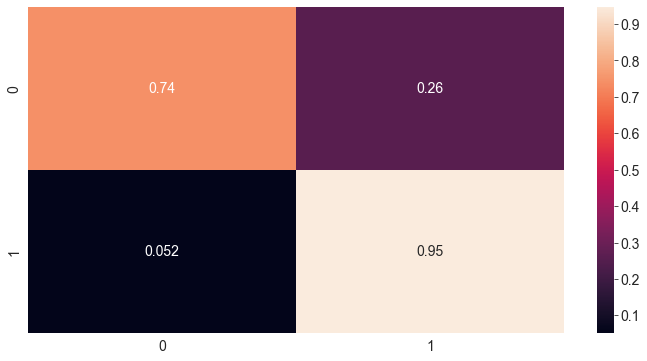

In [20]:
# implement RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)

train_and_test(rf_classifier)

test accuracy score:  0.8465608465608465


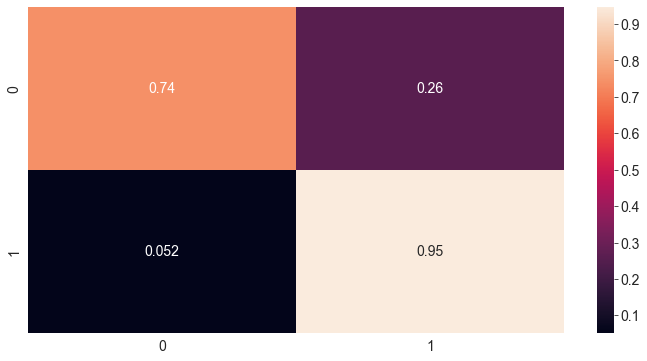

In [21]:
naive_bayes = MultinomialNB()

train_and_test(naive_bayes)

test accuracy score:  0.8492063492063492


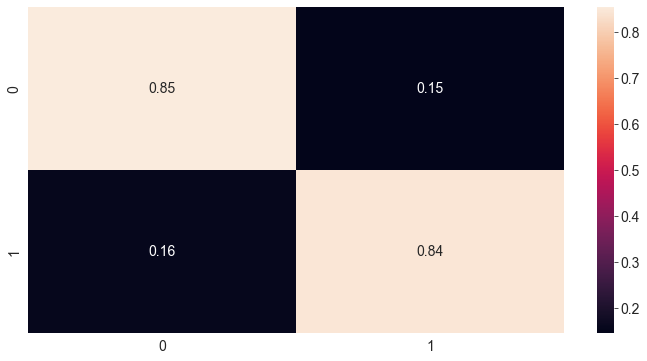

In [22]:
pa_classifier = PassiveAggressiveClassifier()

train_and_test(pa_classifier)

### Feature Extraction using TF-IDF

In [28]:
tf_idf = TfidfVectorizer(ngram_range=(2,3))
train_inputs = tf_idf.fit_transform(train_headlines)

In [29]:
tf_idf.get_feature_names_out()

array(['aa contract', 'aa contract welsh', 'aa jeanette', ...,
       'zygotic mynci it', 'zyklon the', 'zyklon the deadly'],
      dtype=object)

In [30]:
len(tf_idf.get_feature_names_out())

1552302

In [31]:
test_inputs = tf_idf.transform(test_headlines)

test accuracy score:  0.8386243386243386


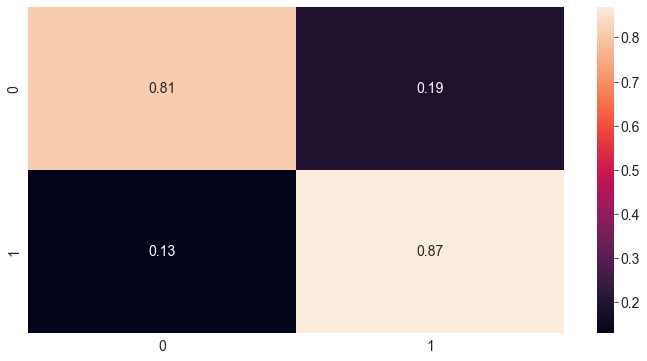

In [34]:
train_and_test(rf_classifier)

test accuracy score:  0.8518518518518519


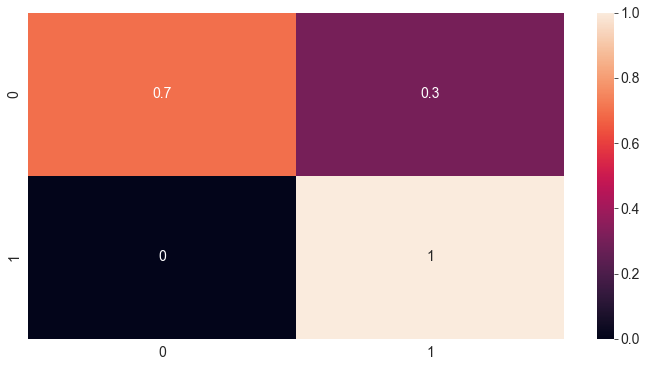

In [35]:
train_and_test(naive_bayes)

test accuracy score:  0.8518518518518519


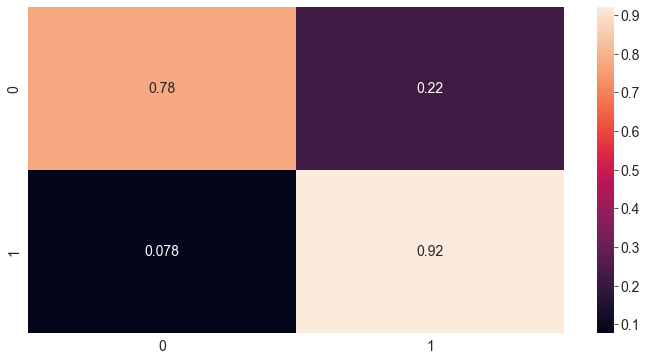

In [36]:
train_and_test(pa_classifier)